# Heart Disease Prediction using Deep Learning

## Introduction
This project aims to predict heart disease using clinical data from the UCI Machine Learning Repository. We will use various deep learning models to understand their performance on this dataset. The models include a Multi-layer Perceptron (MLP), a Convolutional Neural Network (CNN), and a Recurrent Neural Network (RNN).

## Dataset
The dataset contains 14 features, including age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, ST depression induced by exercise relative to rest, slope of the peak exercise ST segment, number of major vessels colored by fluoroscopy, and thalassemia. The target variable indicates the presence or absence of heart disease.

## Methods
1. Data Preprocessing: Handling missing values and normalization.
2. Model Development: Implementing and training different deep learning models.
3. Model Evaluation: Evaluating model performance using various metrics and visualizations.

## Data Preprocessing
In this step, we handle missing values and normalize the data to prepare it for model training.

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Fetch dataset
heart_disease = fetch_ucirepo(id=45)

# Data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# Manually define the column names if there is a mismatch
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]
X.columns = column_names

# Convert to DataFrame if needed
X = pd.DataFrame(X, columns=column_names)

# Assuming y is a DataFrame and the target column needs to be extracted
y = y.iloc[:, 0]
y.name = "target"

# Handle missing values and convert data types
for column in X.columns:
    if X[column].dtype == object:
        X[column] = X[column].replace('?', pd.NA)
        X[column] = X[column].astype(float)
    if X[column].isnull().sum() > 0:
        X[column].fillna(X[column].median(), inplace=True)

# Normalize the data
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split into features and target
X = X_scaled
y = y.astype(float)

# Binarize the target variable
y = (y > 0).astype(float)

print("Data Preprocessing Completed")

Data Preprocessing Completed


## Exploratory Data Analysis (EDA)
In this step, we visualize the relationships between features and the target variable using pair plots and a correlation heatmap.

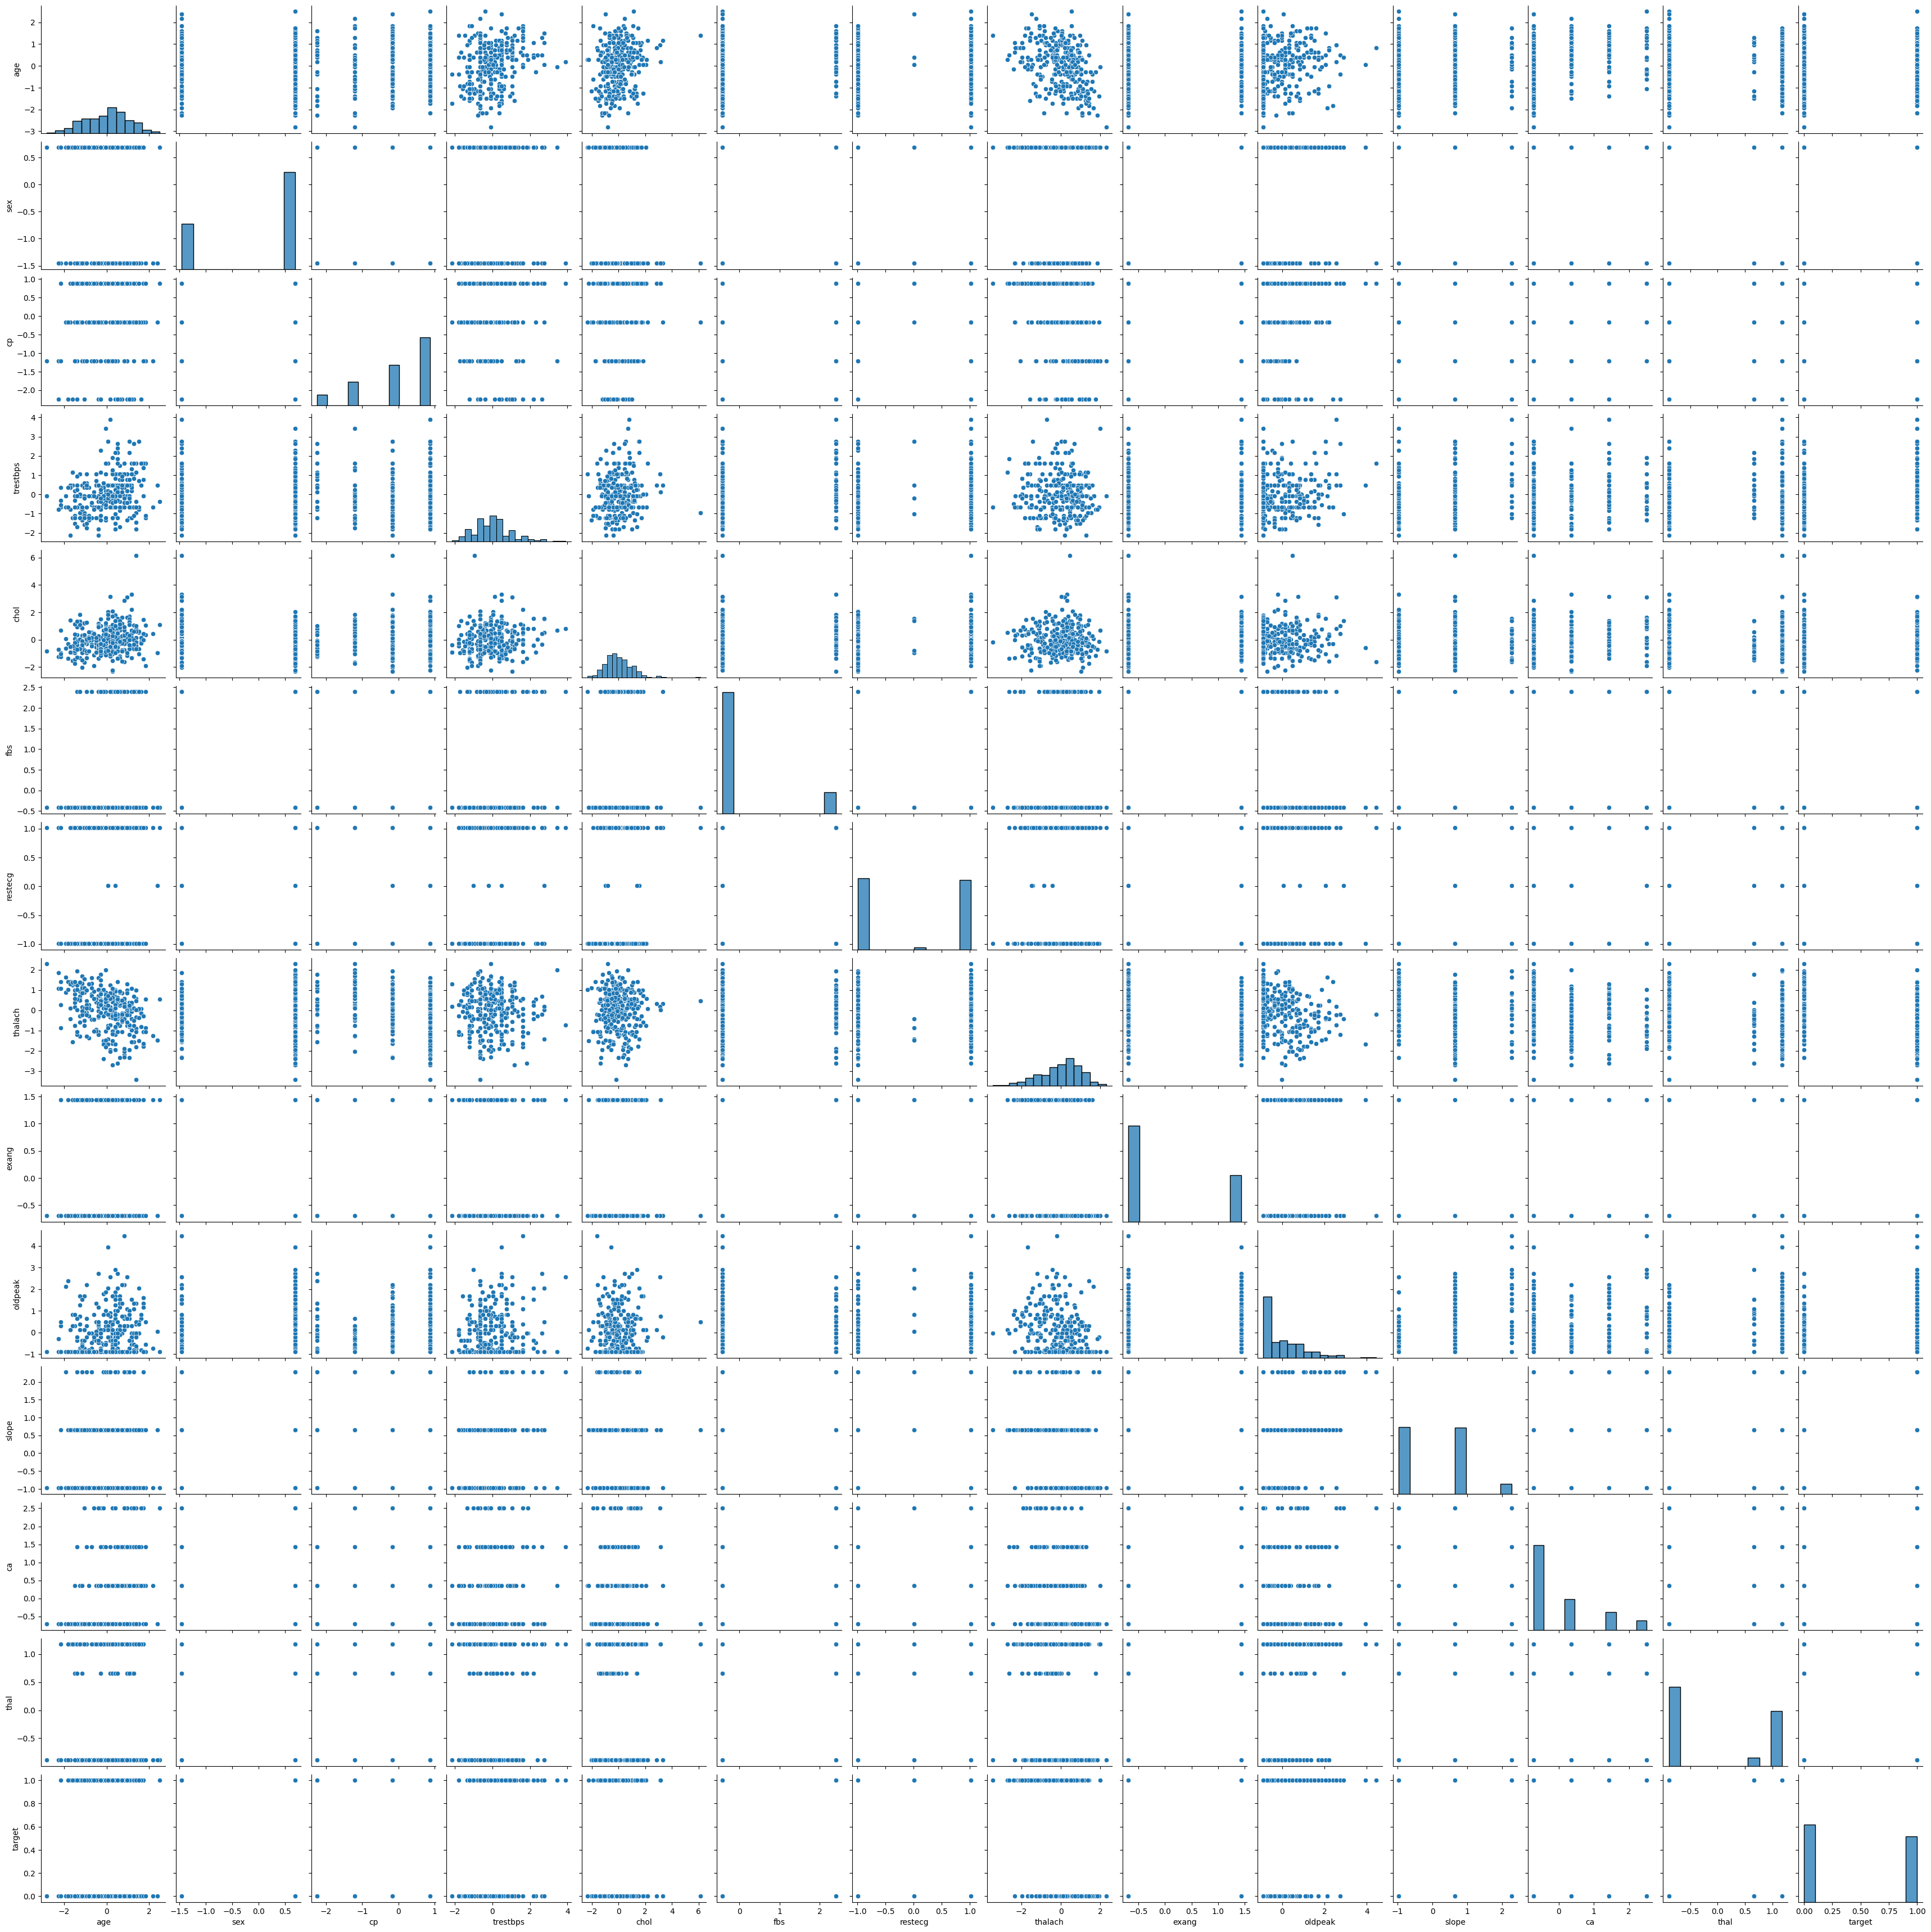

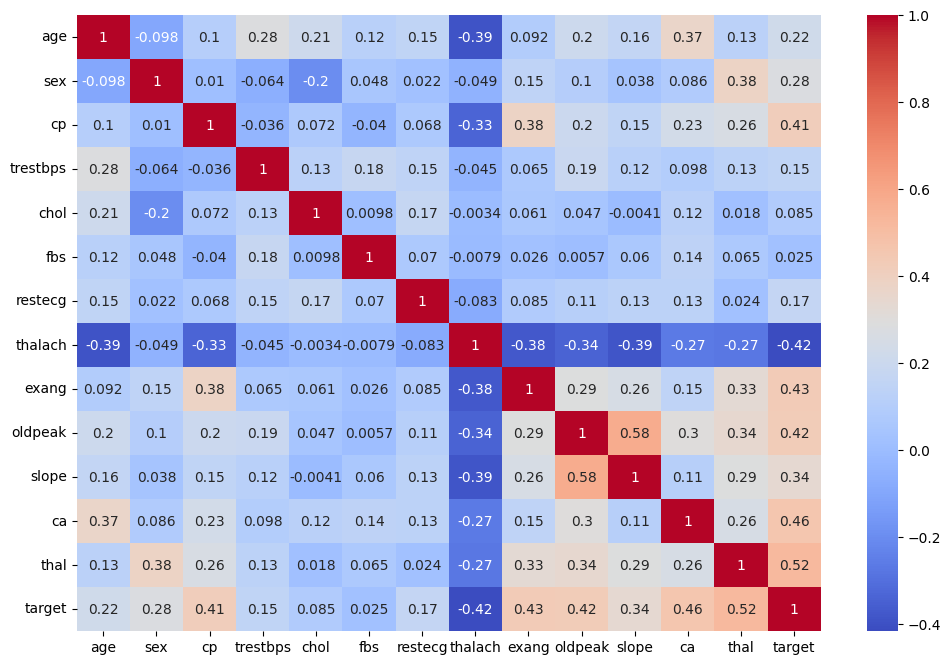

EDA Completed


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot to visualize relationships
sns.pairplot(pd.concat([X, y], axis=1))
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pd.concat([X, y], axis=1).corr(), annot=True, cmap='coolwarm')
plt.show()

print("EDA Completed")

## Model Development and Training
We will implement and train multiple models: a deeper Multi-layer Perceptron (MLP), a Convolutional Neural Network (CNN), and a Recurrent Neural Network (RNN).

### Multi-layer Perceptron (MLP)
We start with a deeper MLP model to capture complex patterns in the data.

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32)

# Create a dataset and data loaders
dataset = TensorDataset(X_tensor, y_tensor)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the MLP model
class DeeperMLP(nn.Module):
    def __init__(self):
        super(DeeperMLP, self).__init__()
        self.fc1 = nn.Linear(X_tensor.shape[1], 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        x = self.sigmoid(x)
        return x

# Initialize the model, loss function, and optimizer
mlp_model = DeeperMLP()
criterion = nn.BCELoss()
optimizer = optim.Adam(mlp_model.parameters(), lr=0.001)

# Training loop for the MLP model
num_epochs = 20
for epoch in range(num_epochs):
    mlp_model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = mlp_model(inputs)
        loss = criterion(outputs, labels.unsqueeze(1))
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

# Evaluate the MLP model
mlp_model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = mlp_model(inputs)
        predicted = (outputs > 0.5).float()
        total += labels.size(0)
        correct += (predicted.squeeze() == labels).sum().item()

mlp_accuracy = 100 * correct / total
print(f"MLP Test Accuracy: {mlp_accuracy:.2f}%")

Epoch 1/20, Loss: 0.6668158173561096
Epoch 2/20, Loss: 0.5982882380485535
Epoch 3/20, Loss: 0.549490213394165
Epoch 4/20, Loss: 0.4301248788833618
Epoch 5/20, Loss: 0.34981799125671387
Epoch 6/20, Loss: 0.4740433692932129
Epoch 7/20, Loss: 0.0911940410733223
Epoch 8/20, Loss: 0.24092020094394684
Epoch 9/20, Loss: 0.3920983076095581
Epoch 10/20, Loss: 0.5054392218589783
Epoch 11/20, Loss: 0.401905357837677
Epoch 12/20, Loss: 0.435387521982193
Epoch 13/20, Loss: 0.2982558012008667
Epoch 14/20, Loss: 0.11856380850076675
Epoch 15/20, Loss: 0.2974662482738495
Epoch 16/20, Loss: 0.22883997857570648
Epoch 17/20, Loss: 0.24976062774658203
Epoch 18/20, Loss: 0.22192810475826263
Epoch 19/20, Loss: 0.13020697236061096
Epoch 20/20, Loss: 0.15131671726703644
MLP Test Accuracy: 81.97%


### Convolutional Neural Network (CNN)
Next, we implement a simple 1D CNN to capture patterns in the data.

In [8]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv1d(1, 32, kernel_size=2, stride=1, padding=1)
        self.conv2 = nn.Conv1d(32, 64, kernel_size=2, stride=1, padding=1)
        self._to_linear = None
        self.fc1 = nn.Linear(self._get_conv_output((1, 13)), 32)  # Adjust based on input shape after convolutions
        self.fc2 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def _get_conv_output(self, shape):
        x = torch.rand(1, *shape)
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        self._to_linear = x.view(1, -1).size(1)
        return self._to_linear

    def forward(self, x):
        x = x.unsqueeze(1)  # Add channel dimension
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

# Initialize the model, loss function, and optimizer
cnn_model = SimpleCNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

# Training loop for the CNN model
num_epochs = 20
for epoch in range(num_epochs):
    cnn_model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = cnn_model(inputs)
        loss = criterion(outputs, labels.unsqueeze(1))
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

# Evaluate the CNN model
cnn_model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = cnn_model(inputs)
        predicted = (outputs > 0.5).float()
        total += labels.size(0)
        correct += (predicted.squeeze() == labels).sum().item()

cnn_accuracy = 100 * correct / total
print(f"CNN Test Accuracy: {cnn_accuracy:.2f}%")


Epoch 1/20, Loss: 0.5510852932929993
Epoch 2/20, Loss: 0.5662745833396912
Epoch 3/20, Loss: 0.40305525064468384
Epoch 4/20, Loss: 0.2652345895767212
Epoch 5/20, Loss: 0.4471152722835541
Epoch 6/20, Loss: 0.1877901405096054
Epoch 7/20, Loss: 0.2440275102853775
Epoch 8/20, Loss: 0.20801354944705963
Epoch 9/20, Loss: 0.5029380321502686
Epoch 10/20, Loss: 0.22305501997470856
Epoch 11/20, Loss: 0.37296319007873535
Epoch 12/20, Loss: 0.17729274928569794
Epoch 13/20, Loss: 0.27696922421455383
Epoch 14/20, Loss: 0.10859254747629166
Epoch 15/20, Loss: 0.3447984755039215
Epoch 16/20, Loss: 0.3800314664840698
Epoch 17/20, Loss: 0.49833741784095764
Epoch 18/20, Loss: 0.4153186082839966
Epoch 19/20, Loss: 0.19027899205684662
Epoch 20/20, Loss: 0.41812074184417725
CNN Test Accuracy: 85.25%


### Recurrent Neural Network (RNN)
Lastly, we implement a simple RNN to capture temporal patterns in the data.

In [9]:
class SimpleRNN(nn.Module):
    def __init__(self):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size=1, hidden_size=32, num_layers=1, batch_first=True)
        self.fc1 = nn.Linear(32 * 13, 32)
        self.fc2 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = x.unsqueeze(2)  # Add feature dimension
        h0 = torch.zeros(1, x.size(0), 32).to(x.device)  # Initialize hidden state
        x, _ = self.rnn(x, h0)
        x = x.contiguous().view(x.size(0), -1)  # Flatten the tensor
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

# Initialize the model, loss function, and optimizer
rnn_model = SimpleRNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(rnn_model.parameters(), lr=0.001)

# Training loop for the RNN model
num_epochs = 20
for epoch in range(num_epochs):
    rnn_model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = rnn_model(inputs)
        loss = criterion(outputs, labels.unsqueeze(1))
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

# Evaluate the RNN model
rnn_model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = rnn_model(inputs)
        predicted = (outputs > 0.5).float()
        total += labels.size(0)
        correct += (predicted.squeeze() == labels).sum().item()

rnn_accuracy = 100 * correct / total
print(f"RNN Test Accuracy: {rnn_accuracy:.2f}%")

Epoch 1/20, Loss: 0.6513054370880127
Epoch 2/20, Loss: 0.6090355515480042
Epoch 3/20, Loss: 0.4383086562156677
Epoch 4/20, Loss: 0.5794546604156494
Epoch 5/20, Loss: 0.17610013484954834
Epoch 6/20, Loss: 0.4979167580604553
Epoch 7/20, Loss: 0.27586328983306885
Epoch 8/20, Loss: 0.4458456039428711
Epoch 9/20, Loss: 0.2998683750629425
Epoch 10/20, Loss: 0.34124356508255005
Epoch 11/20, Loss: 0.3720214068889618
Epoch 12/20, Loss: 0.40767213702201843
Epoch 13/20, Loss: 0.33020973205566406
Epoch 14/20, Loss: 0.19701415300369263
Epoch 15/20, Loss: 0.4812333881855011
Epoch 16/20, Loss: 0.4000450670719147
Epoch 17/20, Loss: 0.35758233070373535
Epoch 18/20, Loss: 0.2146313339471817
Epoch 19/20, Loss: 0.24799193441867828
Epoch 20/20, Loss: 0.6898938417434692
RNN Test Accuracy: 85.25%


## Model Evaluation and Comparison
We will now evaluate and compare the performance of all three models using various metrics and visualizations.

MLP Accuracy: 0.82, Precision: 0.84, Recall: 0.81, F1 Score: 0.83, ROC AUC: 0.88
CNN Accuracy: 0.85, Precision: 0.87, Recall: 0.84, F1 Score: 0.86, ROC AUC: 0.91
RNN Accuracy: 0.85, Precision: 0.93, Recall: 0.78, F1 Score: 0.85, ROC AUC: 0.91


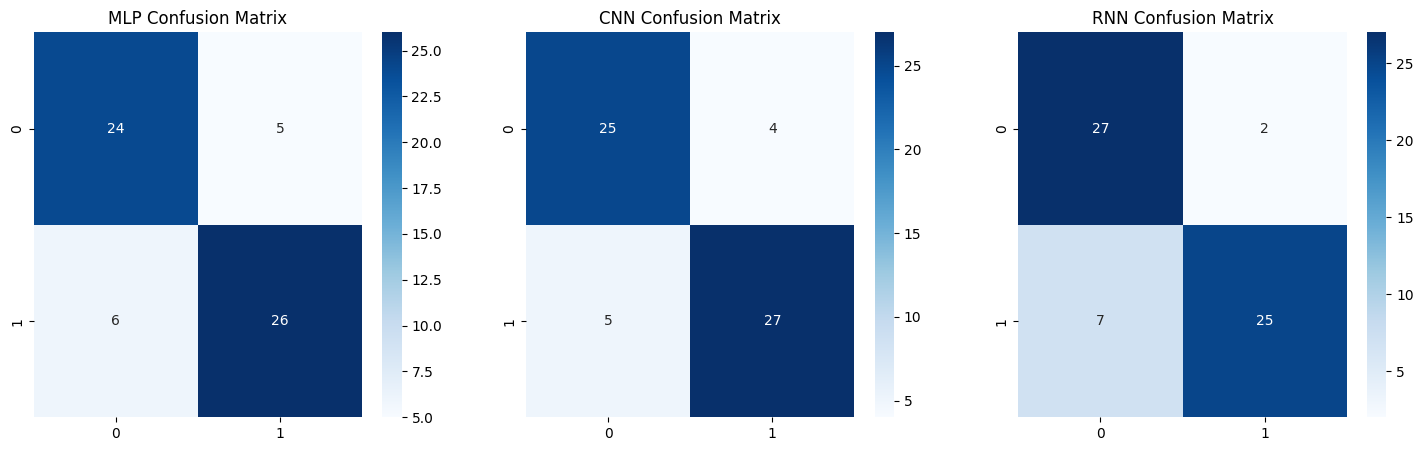

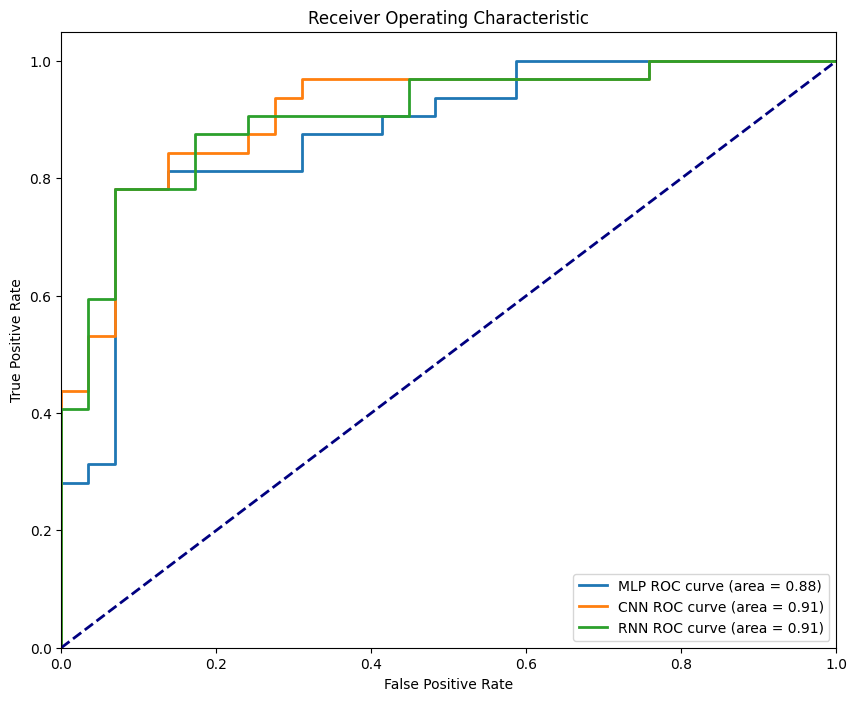

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import numpy as np

def evaluate_model(model, test_loader):
    model.eval()
    y_pred = []
    y_prob = []
    y_true = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            predicted = (outputs > 0.5).float()
            y_pred.extend(predicted.numpy())
            y_prob.extend(outputs.numpy())
            y_true.extend(labels.numpy())
    y_pred = np.array(y_pred).flatten()
    y_prob = np.array(y_prob).flatten()
    y_true = np.array(y_true).flatten()
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_prob)
    conf_matrix = confusion_matrix(y_true, y_pred)
    return accuracy, precision, recall, f1, roc_auc, conf_matrix, y_true, y_prob


# Evaluate each model
mlp_metrics = evaluate_model(mlp_model, test_loader)
cnn_metrics = evaluate_model(cnn_model, test_loader)
rnn_metrics = evaluate_model(rnn_model, test_loader)

# Print the metrics
print(f"MLP Accuracy: {mlp_metrics[0]:.2f}, Precision: {mlp_metrics[1]:.2f}, Recall: {mlp_metrics[2]:.2f}, F1 Score: {mlp_metrics[3]:.2f}, ROC AUC: {mlp_metrics[4]:.2f}")
print(f"CNN Accuracy: {cnn_metrics[0]:.2f}, Precision: {cnn_metrics[1]:.2f}, Recall: {cnn_metrics[2]:.2f}, F1 Score: {cnn_metrics[3]:.2f}, ROC AUC: {cnn_metrics[4]:.2f}")
print(f"RNN Accuracy: {rnn_metrics[0]:.2f}, Precision: {rnn_metrics[1]:.2f}, Recall: {rnn_metrics[2]:.2f}, F1 Score: {rnn_metrics[3]:.2f}, ROC AUC: {rnn_metrics[4]:.2f}")

# Confusion matrix heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.heatmap(mlp_metrics[5], annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('MLP Confusion Matrix')
sns.heatmap(cnn_metrics[5], annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('CNN Confusion Matrix')
sns.heatmap(rnn_metrics[5], annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('RNN Confusion Matrix')
plt.show()

# ROC curves
fig, ax = plt.subplots(figsize=(10, 8))
for model, metrics, label in zip([mlp_model, cnn_model, rnn_model], [mlp_metrics, cnn_metrics, rnn_metrics], ['MLP', 'CNN', 'RNN']):
    fpr, tpr, _ = roc_curve(metrics[6], metrics[7])
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, lw=2, label=f'{label} ROC curve (area = {roc_auc:.2f})')
ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic')
ax.legend(loc='lower right')
plt.show()


## Conclusion
In this project, we developed and compared three different deep learning models (MLP, CNN, RNN) for predicting heart disease using clinical data. We evaluated their performances using various metrics and visualizations. The results show that each model has its strengths and weaknesses, and further tuning and experimentation could improve their performance.